<a href="https://colab.research.google.com/github/sudharshanpaul/Deep-Learning/blob/main/CNN/Pneumonia_xray_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DataDir = '/content/drive/MyDrive/chest_xray/train/'

In [4]:
CATEGORIES = ['NORMAL', 'PNEUMONIA']

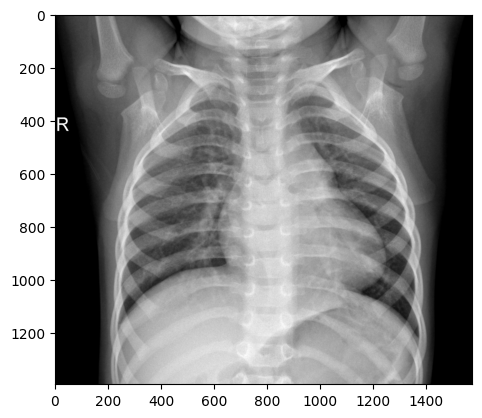

In [5]:
for i in CATEGORIES:
  path = os.path.join(DataDir, i)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break
  break

In [6]:
img_size = 100

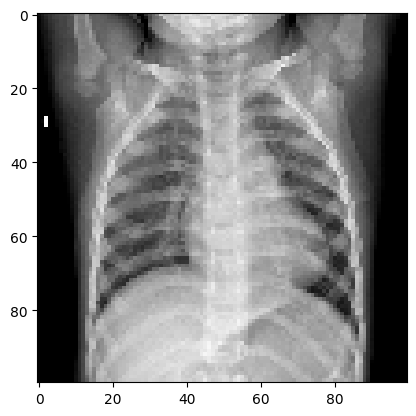

In [7]:
## Immage after resize and gray scale
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [8]:
training_data = []

In [9]:
# defining the function for training data according to the categories converting the images into gray scale with resizing the image into 100 x 100
# converting it into numpy arrays
def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])

            except Exception as e:
                pass

In [10]:
create_training_data()

In [11]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
  print(sample)

[array([[222, 232, 169, ...,  43,  45,  58],
       [244, 162, 194, ...,  50,  51,  63],
       [254, 249, 218, ...,  55,  66,  18],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[ 15,  18,  30, ...,   1,   0,   1],
       [ 17,  19,  30, ...,   6,   2, 247],
       [ 17,  20,  31, ...,   4, 148, 252],
       ...,
       [  0,   0,   0, ..., 246, 144, 252],
       [  0,   0,   0, ...,   3,   7,  34],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[ 65,  71,  74, ...,  17, 225, 108],
       [ 65,  66,  73, ...,  25,  50, 195],
       [ 56,  68,  79, ..., 222, 241, 174],
       ...,
       [  4,  10,  12, ...,   0,   0,  25],
       [  2,   4,   6, ...,   0,   0,  23],
       [ 99,   2,   3, ...,   0,   0,  25]], dtype=uint8), 1]
[array([[123,  79, 122, ...,  46,  91, 118],
       [ 91, 114, 111, ...,  44,  78, 121],
       [114, 120, 110, ...

In [13]:
X=[]
y=[]

In [14]:
for features, labels in training_data:
  X.append(features)
  y.append(labels)

In [15]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[222]
   [232]
   [169]
   ...
   [ 43]
   [ 45]
   [ 58]]

  [[244]
   [162]
   [194]
   ...
   [ 50]
   [ 51]
   [ 63]]

  [[254]
   [249]
   [218]
   ...
   [ 55]
   [ 66]
   [ 18]]

  ...

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]]]


In [16]:
y = np.array(y)

In [17]:
# reshapping the features for making it compatible with tensorflow
X=np.array(X).reshape(-1,img_size,img_size,1)

In [18]:
#as we do for training data similiarly doing with validation data
validation_data=[]
DataDir_val= '/content/drive/MyDrive/chest_xray/val/'

In [19]:
def create_validation_data():
  for i in CATEGORIES:
    path = os.path.join(DataDir_val, i)
    label = CATEGORIES.index(i)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (img_size, img_size))
        validation_data.append([new_array, label])
      except Exception as e:
        pass


In [20]:
create_validation_data()
print(len(validation_data))

16


In [21]:
import random
random.shuffle(validation_data)
for sample in validation_data[:5]:
  print(sample)

[array([[  0,   8,  24, ...,  65,  61, 103],
       [  0,   3,  23, ...,  67,  59, 121],
       [  1,   0,  18, ...,  61,  58, 123],
       ...,
       [  2,   2,   2, ...,   1,   2,   2],
       [  2,   2,   2, ...,   1,   2,   2],
       [  2,   2,   2, ...,   1,   2,   2]], dtype=uint8), 1]
[array([[ 2, 17, 31, ..., 95, 86, 68],
       [ 6, 14, 25, ..., 94, 68, 62],
       [ 2, 10, 23, ..., 88, 73, 60],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[  0,   0,   0, ...,   6,   6,   6],
       [  0,   0,   0, ...,   6,   6,   6],
       [  0,   0,   0, ...,   6,   6,   6],
       ...,
       [  3,   3,   3, ..., 222,  51,   7],
       [  3,   3,   3, ..., 190,  58,  10],
       [  3,   4,   4, ...,  48,  14,   9]], dtype=uint8), 1]
[array([[ 13,  24,  31, ...,   0,   0,   0],
       [ 12,  24,  96, ...,   0,   0,   0],
       [ 11, 254, 163, ...,   0,   0,   0],
       ...,
      

In [22]:
X_val = []
y_val = []

In [23]:
for features, labels in validation_data:
  X_val.append(features)
  y_val.append(labels)

In [24]:
y_val = np.array(y_val)
X_val = np.array(X_val).reshape(-1, img_size, img_size, 1)

In [25]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
import pickle

In [26]:
X = X/255.0
X_val = X_val/255.0

In [27]:
X.shape

(5226, 100, 100, 1)

In [28]:
X_val.shape

(16, 100, 100, 1)

In [73]:
### Initializing the Neural Network layer for training the model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3,input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Dropout(0.2))


model.add(Conv2D(filters=128, kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [74]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [76]:
model.fit(X,y,batch_size=4,epochs=15,validation_data=(X_val, y_val))

Epoch 1/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7598 - loss: 0.5381 - val_accuracy: 0.6250 - val_loss: 1.1473
Epoch 2/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9195 - loss: 0.2356 - val_accuracy: 0.9375 - val_loss: 0.3060
Epoch 3/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9357 - loss: 0.2223 - val_accuracy: 0.8750 - val_loss: 0.3992
Epoch 4/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9393 - loss: 0.1748 - val_accuracy: 1.0000 - val_loss: 0.1372
Epoch 5/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9420 - loss: 0.1732 - val_accuracy: 0.9375 - val_loss: 0.2276
Epoch 6/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9593 - loss: 0.1258 - val_accuracy: 0.8750 - val_loss: 0.2629
Epoch 7/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9610 - loss: 0.1221 - val_accuracy: 0.8750 - val_loss: 0.3686
Epoch 8/15
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9648 - loss: 0.11

In [78]:
### Saving the model
model.save(r"model_10.h5")

### Testing the model

In [79]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model

In [80]:
# function for preparing the image for predicting the class
def prepare(image):
    img_size=100
    #img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    img=tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,1)

In [81]:
model = tf.keras.models.load_model(r"model_10.h5")

In [89]:
image1='/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person100_bacteria_479.jpeg'

In [90]:
prediction=model.predict([prepare(image1)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[1.]]
1
PNEUMONIA


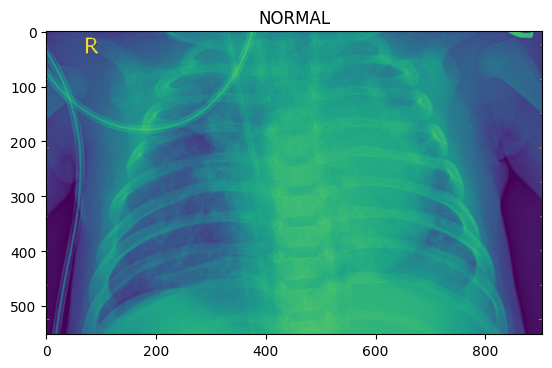

In [95]:
img=mpimg.imread(image1)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()

In [96]:
# importing necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model

# set the path for test data
test_dir = "/content/drive/MyDrive/chest_xray/test/"

# define categories
CATEGORIES = ["NORMAL", "PNEUMONIA"]

# set image size
img_size = 100

# load the saved model
model = load_model('/content/model_10.h5')

# initialize lists for storing test data
X_test = []
y_test = []

# loop through the test data directory and extract the images and their labels
for category in CATEGORIES:
    path = os.path.join(test_dir, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            X_test.append(new_array)
            y_test.append(class_num)
        except Exception as e:
            pass

# convert test data to numpy arrays
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# normalize test data
X_test = X_test / 255.0

# calculate test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

# print test accuracy
print('Test accuracy:', test_acc)

20/20 - 1s - 55ms/step - accuracy: 0.7772 - loss: 2.1711
Test accuracy: 0.7772436141967773
